<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Dimensionality%20Reduction/t-distributed%20Stochastic%20Neighbor%20Embedding/tsne_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-SNE (t-distributed Stochastic Neighbor Embedding) from Scratch

This notebook demonstrates the core ideas of **t-SNE**, a powerful technique used for **visualizing high-dimensional data in 2D or 3D**.

While a full t-SNE implementation can be computationally intense, this notebook aims to:
- Explain the underlying intuition
- Build a simplified version using **NumPy**
- Visualize synthetic high-dimensional data in 2D


## What is t-SNE?

**t-SNE** is a non-linear dimensionality reduction technique, often used for:
- Visualizing word embeddings
- Understanding high-dimensional clusters
- Detecting hidden patterns in datasets

It converts **pairwise similarities** between data points in high-dimensional space into **probabilities**, and attempts to preserve those probabilities when mapping to a low-dimensional space (e.g., 2D).

### How it Works (Simplified):
1. Measure similarities between points in high-dimensional space
2. Construct a similar probability distribution in low dimensions
3. Minimize the difference using **Kullback-Leibler (KL) divergence**

## Generate Sample High-Dimensional Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create 3 clusters in 50D space
X, y = make_blobs(n_samples=300, n_features=50, centers=3, cluster_std=3.0, random_state=42)

print("Original shape:", X.shape)

Original shape: (300, 50)


## Simplified t-SNE Steps

> We'll use pairwise Euclidean distances and build simplified probability distributions without full gradient descent (for educational clarity).



In [2]:
from scipy.spatial.distance import pdist, squareform

def compute_pairwise_affinities(X, sigma=1.0):
    """
    Compute pairwise similarities in high-dimensional space using a Gaussian kernel.
    Returns a symmetric matrix of probabilities.
    """
    distances = squareform(pdist(X, 'euclidean'))
    affinities = np.exp(-distances ** 2 / (2 * sigma ** 2))
    np.fill_diagonal(affinities, 0)
    P = affinities / np.sum(affinities)
    return (P + P.T) / (2 * X.shape[0])  # Symmetrize

## Create Low-Dimensional Embedding

In [3]:
def initialize_Y(n, dim=2):
    return np.random.randn(n, dim) * 1e-4

def compute_low_dim_affinities(Y):
    """
    Compute low-dimensional affinities using t-distribution kernel.
    """
    distances = squareform(pdist(Y, 'euclidean'))
    affinities = 1 / (1 + distances ** 2)
    np.fill_diagonal(affinities, 0)
    Q = affinities / np.sum(affinities)
    return Q

##  Optimization Loop

In [4]:
def tsne(X, iterations=500, learning_rate=100, sigma=1.0):
    n = X.shape[0]
    P = compute_pairwise_affinities(X, sigma)
    Y = initialize_Y(n)

    for iter in range(iterations):
        Q = compute_low_dim_affinities(Y)
        PQ = P - Q

        grads = np.zeros_like(Y)
        for i in range(n):
            for j in range(n):
                diff = Y[i] - Y[j]
                grads[i] += 4 * PQ[i, j] * diff / (1 + np.linalg.norm(diff) ** 2)

        Y += learning_rate * grads

        if iter % 100 == 0:
            loss = np.sum(P * np.log(P / (Q + 1e-10)))
            print(f"Iteration {iter}: KL divergence = {loss:.4f}")

    return Y

## Run and Visualize

/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(P * np.log(P / (Q + 1e-10)))
/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(P * np.log(P / (Q + 1e-10)))


Iteration 0: KL divergence = nan


/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(P * np.log(P / (Q + 1e-10)))
/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(P * np.log(P / (Q + 1e-10)))


Iteration 100: KL divergence = nan


/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(P * np.log(P / (Q + 1e-10)))
/tmp/ipython-input-4-76947111.py:19: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(P * np.log(P / (Q + 1e-10)))


Iteration 200: KL divergence = nan


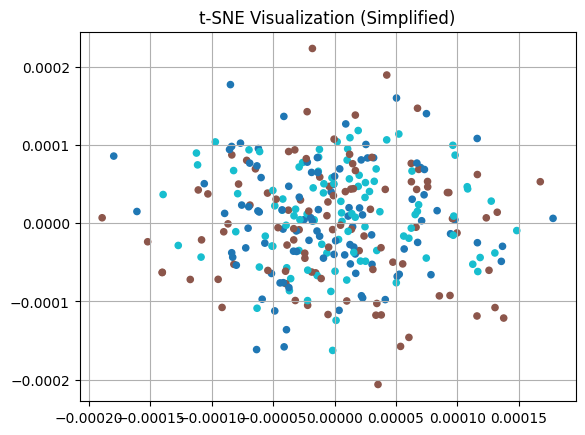

In [5]:
Y_final = tsne(X, iterations=300, learning_rate=0.1, sigma=10.0)

plt.scatter(Y_final[:, 0], Y_final[:, 1], c=y, cmap='tab10', s=20)
plt.title("t-SNE Visualization (Simplified)")
plt.grid(True)
plt.show()

## Summary

- Implemented a simplified version of **t-SNE** from scratch using NumPy
- Focused on pairwise similarities and probability distributions
- Avoided complex gradient descent for clarity
- t-SNE is best for:
  - High-dimensional **visualization**
  - Revealing **clusters**, **manifolds**, and **patterns**
